In [1]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory #, ScoutingNanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
plt.style.use(mplhep.style.CMS)

In [2]:
out = util.load("outfiles/2022/trigger_ScoutingPFMonitor_2022-CHS.coffea")[0]

/tmp/ipykernel_30/1168753714.py:17: RuntimeWarning: invalid value encountered in double_scalars
  ratio = [0.6 if (i <= 5 and var == "mass") else z[0] / z[1] for i,z in enumerate(zip(num.values(), denom.values()))]


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private'))

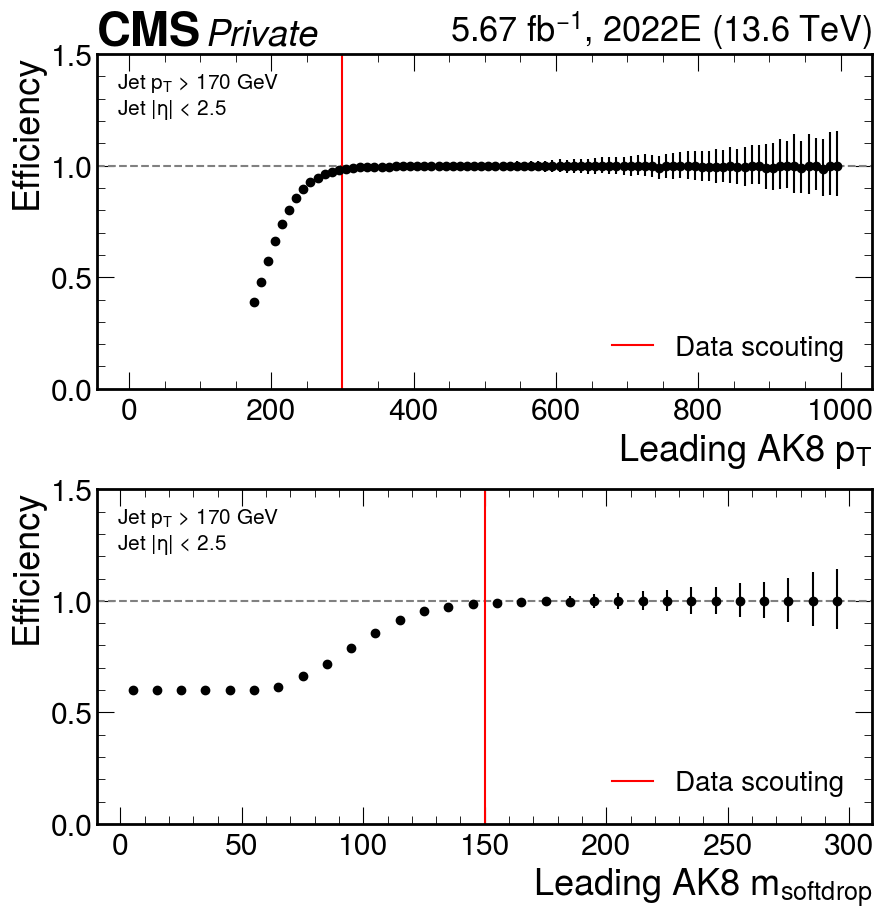

In [13]:
from hist.intervals import ratio_uncertainty
from coffea.hist.plot import clopper_pearson_interval

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={"height_ratios": (1, 1)}, figsize=(10,10)) #, sharex=True)
fig.subplots_adjust(hspace=0.3)
#ax3 = ax1.twiny()

for var, ax in zip(["pt", "mass"], [ax1, ax2]):

    ptproj = (
        out["ak8"]
        .project(var, "trigger")
    )
    denom = ptproj[:, hist.loc("none")]
    num = ptproj[:, hist.loc("Run3_PFScoutingPixelTracking")]

    ratio = [0.6 if (i <= 5 and var == "mass") else z[0] / z[1] for i,z in enumerate(zip(num.values(), denom.values()))]
    x_values = num.axes[0].centers
    ratio_uncert = ratio_uncertainty(
                    num=num.values(),
                    denom=denom.values(),
                    uncertainty_type="poisson",
                )

    ax.errorbar(
                x_values,
                ratio,
                yerr=ratio_uncert,
                color="black",
                marker="o",
                linestyle="none",
                #label="Data scouting"
       )
    
    ax.axhline(y=1, linestyle="--", color="gray")
    if var == "pt":
        ax.axvline(x=300, linestyle="-", color="red", label="Data scouting")
#         ax.axvline(x=500, linestyle="--", color="blue", label="Standard trigger\nstrategy")
        ax.legend(loc="lower right", fontsize=20)
    else:
        ax.axvline(x=150, linestyle="-", color="red", label="Data scouting")
        ax.legend(loc="lower right", fontsize=20)
        
    plt.text(0.025, 0.8, r"Jet p$_T$ > 170 GeV" + "\n" + r"Jet |$\eta$| < 2.5",
                fontsize=15,
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
    
ax1.set_xlabel(r"Leading AK8 p$_{T}$")
ax2.set_xlabel(r"Leading AK8 m$_{softdrop}$")
ax1.set_ylabel("Efficiency")
ax2.set_ylabel("Efficiency")
ax1.set_ylim(0, 1.5)
ax2.set_ylim(0, 1.5)
mplhep.cms.label(ax=ax1, data=True, year="2022E", com=13.6, label="Private", lumi=f"{5.672:.2f}",)

/tmp/ipykernel_30/2382671696.py:16: RuntimeWarning: invalid value encountered in double_scalars
  ratio = [0.2 if (i <= 7 and var == "pt") else z[0] / z[1] for i,z in enumerate(zip(num.values(), denom.values()))]


(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Private'))

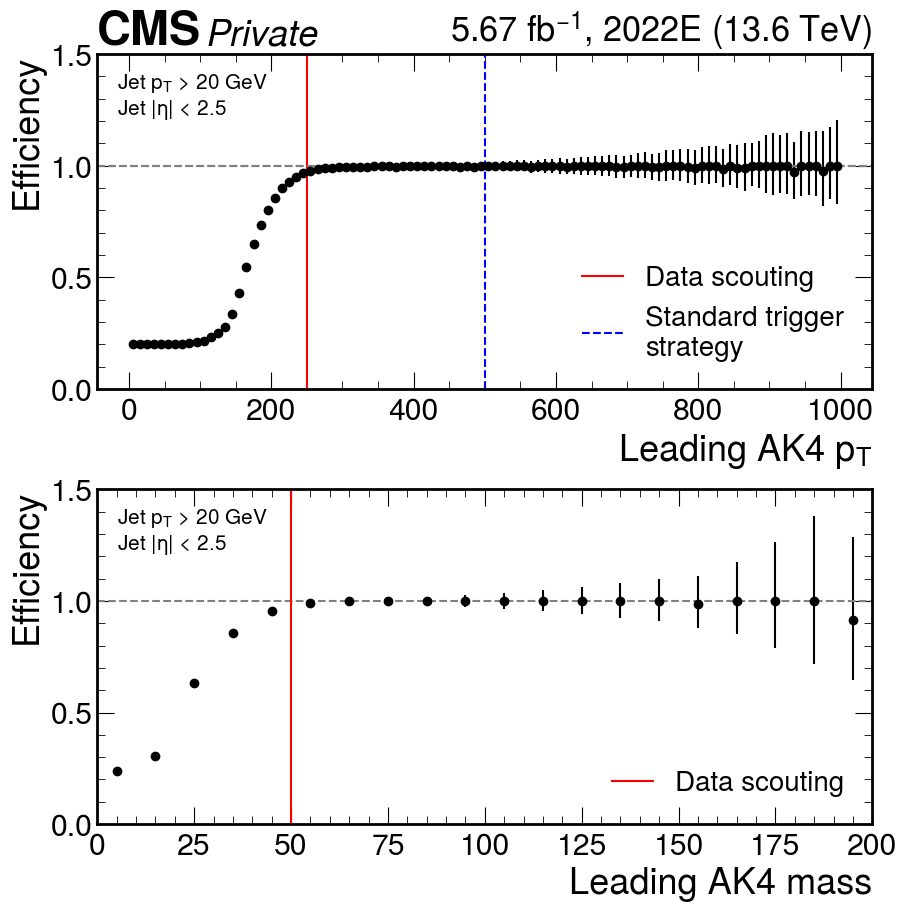

In [30]:
from hist.intervals import ratio_uncertainty

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={"height_ratios": (1, 1)}, figsize=(10,10)) #, sharex=True)
fig.subplots_adjust(hspace=0.3)
#ax3 = ax1.twiny()

for var, ax in zip(["pt", "mass"], [ax1, ax2]):

    ptproj = (
        out["ak4"]
        .project(var, "trigger")
    )
    denom = ptproj[:, hist.loc("none")]
    num = ptproj[:, hist.loc("Run3_PFScoutingPixelTracking")]

    ratio = [0.2 if (i <= 7 and var == "pt") else z[0] / z[1] for i,z in enumerate(zip(num.values(), denom.values()))]
    x_values = num.axes[0].centers
    ratio_uncert = ratio_uncertainty(
                    num=num.values(),
                    denom=denom.values(),
                    uncertainty_type="poisson",
                )

    ax.errorbar(
                x_values,
                ratio,
                yerr=ratio_uncert,
                color="black",
                marker="o",
                linestyle="none",
                #label="Data scouting"
            )
    
    ax.axhline(y=1, linestyle="--", color="gray")
    if var == "pt":
        ax.axvline(x=250, linestyle="-", color="red", label="Data scouting")
        ax.axvline(x=500, linestyle="--", color="blue", label="Standard trigger\nstrategy")
    else:
        ax.axvline(x=50, linestyle="-", color="red", label="Data scouting")
    
    ax.legend(loc="lower right", fontsize=20)
    plt.text(0.025, 0.8, r"Jet p$_T$ > 20 GeV" + "\n" + r"Jet |$\eta$| < 2.5",
                fontsize=15,
                horizontalalignment='left',
                verticalalignment='bottom',
                transform=ax.transAxes
               )
    
ax1.axhline(y=1, linestyle="--", color="gray")
ax1.set_xlabel(r"Leading AK4 p$_{T}$")
ax2.set_xlabel(r"Leading AK4 mass")
ax1.set_ylabel("Efficiency")
ax2.set_ylabel("Efficiency")
ax2.set_xlim(0, 200)
ax1.set_ylim(0, 1.5)
ax2.set_ylim(0, 1.5)
mplhep.cms.label(ax=ax1, data=True, year="2022E", com=13.6, label="Private", lumi=f"{5.672:.2f}",)

In [22]:
out["ak8"]

Hist(
  StrCategory([], growth=True, name='dataset', label='Dataset name'),
  StrCategory([], growth=True, name='trigger', label='Trigger name'),
  Regular(100, 0, 1000, name='pt', label='Leading jet $p_T$'),
  Regular(30, 0, 300, name='mass', label='Leading jet mass'),
  Regular(300, 0, 3000, name='ht', label='Event HT'),
  storage=Double())

KeyError: "'none' not in axis"

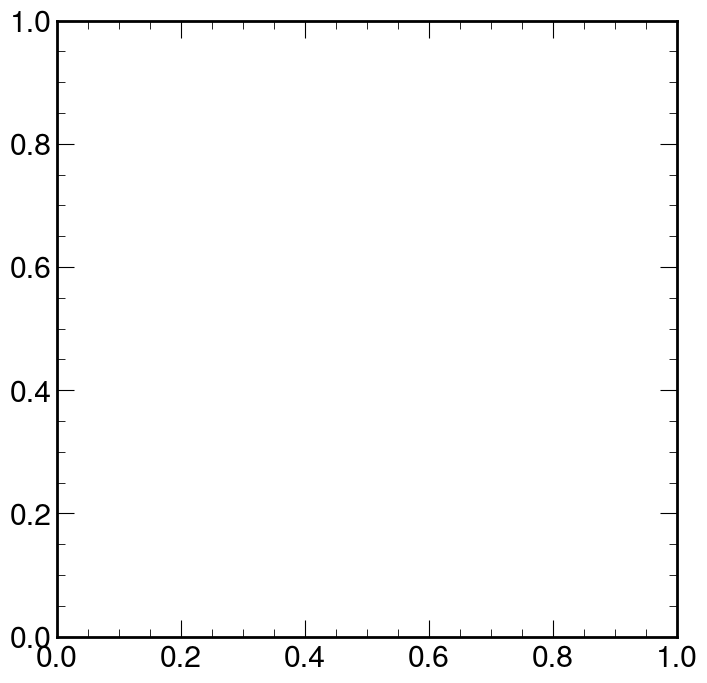

In [20]:
import warnings
warnings.filterwarnings("ignore", "invalid value encountered in divide")

for era in ["C", "D", "E", "F", "G"]:
    
    dataset = "2022" + era

    fig, ax = plt.subplots(figsize=(8,8))

    colours = {
        'L1_HTT360er' : "royalblue",
        'L1_HTT450er' : "#A7226e",
        'L1_HTT400er' : "#EC2049",
        'L1_SingleJet200' : '#FF8C00',
        'L1_SingleJet180' : '#F7DB4F',
        'any': "#2F9599",
    }

    triggers = ['L1_HTT360er', 'L1_HTT400er', 'L1_HTT450er', 'L1_SingleJet180', 'L1_SingleJet200', 'any']
    #triggers = ['PFHT780', 'PFHT1050', 'PFJet200', 'PFJet260', 'PFJet320', 'PFJet400', 'PFJet450', 'PFJet500', 'PFJet550', 'PFHT590', 'PFHT680', 'PFHT430', 'PFHT510', 'PFHT250', 'PFHT890', 'PFHT370', 'PFJet110', 'PFJet140', 'PFHT180', 'PFJet40', 'PFJet60', 'any']

    for trigger in triggers:

        ptproj = (
            out["ak8"]
            .project("pt", "trigger", "dataset")
        )
        denom = ptproj[:, hist.loc("none"), hist.loc(dataset)]
        num = ptproj[:, hist.loc(trigger), hist.loc(dataset)]

        hist_data_before, hist_bins = denom.to_numpy()
        hist_data_after, hist_bins = num.to_numpy()

        from scipy.stats import beta

        def binom_int(num, den, confint=0.68):
            quant = (1 - confint)/ 2.
            low = beta.ppf(quant, num, den - num + 1)
            high = beta.ppf(1 - quant, num + 1, den - num)
            return (np.nan_to_num(low), np.where(np.isnan(high), 1, high))

        # calculating efficiency
        efficiency = hist_data_after/hist_data_before

        # getting error band
        band_low, band_high = binom_int(hist_data_after, hist_data_before)
        error_low = efficiency - band_low
        error_high = band_high - efficiency

        # removing large errors in empty bins
        error_low[error_low == 1] = 0
        error_high[error_high == 1] = 0

        # stacking errors
        error = np.concatenate((error_low.reshape(error_low.shape[0], 1), error_high.reshape(error_high.shape[0], 1)), axis=1)

        data_err_opts = {
                'linestyle': 'none',
                'marker': '.',
                'markersize': 10.,
                'elinewidth': 1,
            }

        ax.errorbar(
                        num.axes[0].centers,
                        efficiency,
                        yerr=error.T,
                        color=colours[trigger],
                        label=trigger if trigger != "any" else "Logical OR of all above",
                        **data_err_opts,
                    )

    mplhep.cms.label(ax=ax, data=True, year=dataset, com=13.6, label="Preliminary")
    ax.set_xlabel(r"Scouting leading AK8 jet $p_T$ (GeV)")
    ax.set_ylim(0, 1.1)
    ax.axhline(y=1, linestyle="--", color="gray")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel("Efficiency")
    #ax.set_xlim(0, 1500)

(0.0, 1500.0)

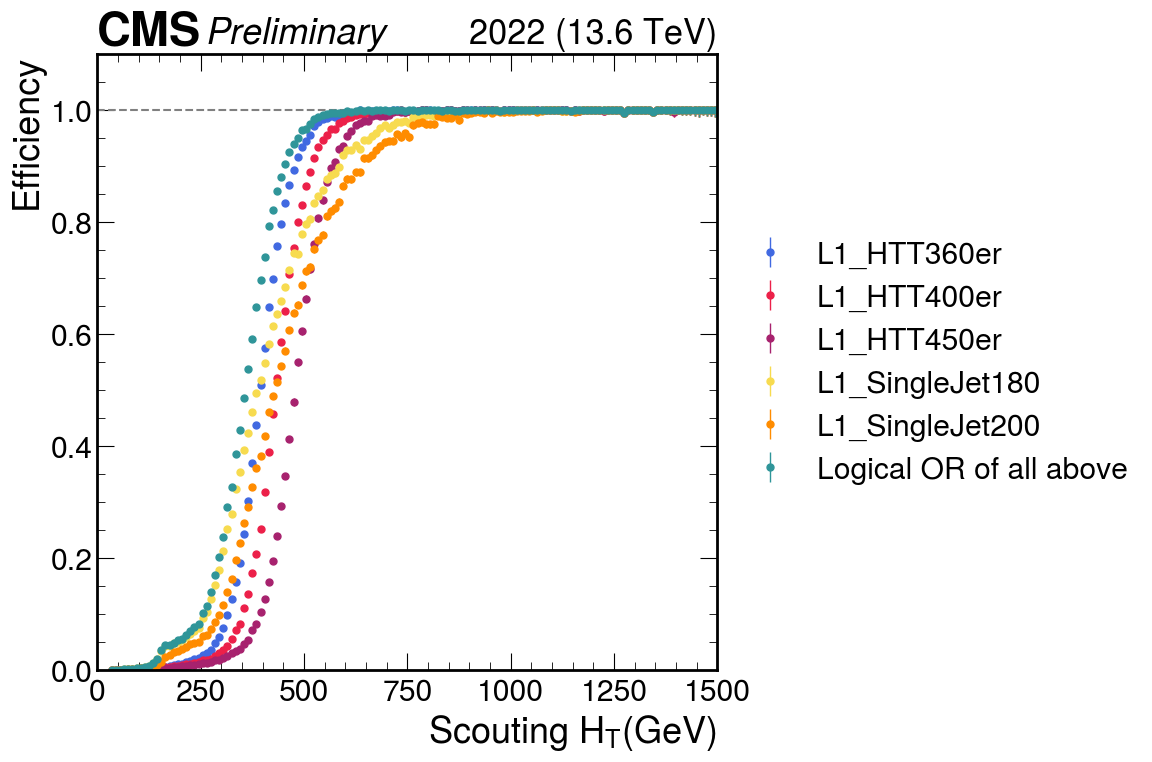

In [28]:
import warnings
warnings.filterwarnings("ignore", "invalid value encountered in divide")

dataset = "2022"

fig, ax = plt.subplots(figsize=(8,8))

colours = {
    'L1_HTT360er' : "royalblue",
    'L1_HTT450er' : "#A7226e",
    'L1_HTT400er' : "#EC2049",
    'L1_SingleJet200' : '#FF8C00',
    'L1_SingleJet180' : '#F7DB4F',
    'any': "#2F9599",
}

triggers = ['L1_HTT360er', 'L1_HTT400er', 'L1_HTT450er', 'L1_SingleJet180', 'L1_SingleJet200', 'any']
#triggers = ['PFHT780', 'PFHT1050', 'PFJet200', 'PFJet260', 'PFJet320', 'PFJet400', 'PFJet450', 'PFJet500', 'PFJet550', 'PFHT590', 'PFHT680', 'PFHT430', 'PFHT510', 'PFHT250', 'PFHT890', 'PFHT370', 'PFJet110', 'PFJet140', 'PFHT180', 'PFJet40', 'PFJet60', 'any']

for trigger in triggers:

    ptproj = (
        out["ak4"]
        .project("ht", "trigger", "dataset")
    )
    denom = ptproj[:, hist.loc("none"), sum]
    num = ptproj[:, hist.loc(trigger), sum]

    hist_data_before, hist_bins = denom.to_numpy()
    hist_data_after, hist_bins = num.to_numpy()

    from scipy.stats import beta

    def binom_int(num, den, confint=0.68):
        quant = (1 - confint)/ 2.
        low = beta.ppf(quant, num, den - num + 1)
        high = beta.ppf(1 - quant, num + 1, den - num)
        return (np.nan_to_num(low), np.where(np.isnan(high), 1, high))

    # calculating efficiency
    efficiency = hist_data_after/hist_data_before

    # getting error band
    band_low, band_high = binom_int(hist_data_after, hist_data_before)
    error_low = efficiency - band_low
    error_high = band_high - efficiency

    # removing large errors in empty bins
    error_low[error_low == 1] = 0
    error_high[error_high == 1] = 0

    # stacking errors
    error = np.concatenate((error_low.reshape(error_low.shape[0], 1), error_high.reshape(error_high.shape[0], 1)), axis=1)

    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'elinewidth': 1,
        }

    ax.errorbar(
                    num.axes[0].centers,
                    efficiency,
                    yerr=error.T,
                    color=colours[trigger],
                    label=trigger if trigger != "any" else "Logical OR of all above",
                    **data_err_opts,
                )

mplhep.cms.label(ax=ax, data=True, year=dataset, com=13.6, label="Preliminary")
ax.set_xlabel(r"Scouting $H_T$(GeV)")
ax.set_ylim(0, 1.1)
ax.axhline(y=1, linestyle="--", color="gray")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Efficiency")
ax.set_xlim(0, 1500)

/tmp/ipykernel_30/149747380.py:49: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before
/tmp/ipykernel_30/149747380.py:49: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before
/tmp/ipykernel_30/149747380.py:49: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before
/tmp/ipykernel_30/149747380.py:49: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before
/tmp/ipykernel_30/149747380.py:49: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before


Text(0, 1, 'Efficiency')

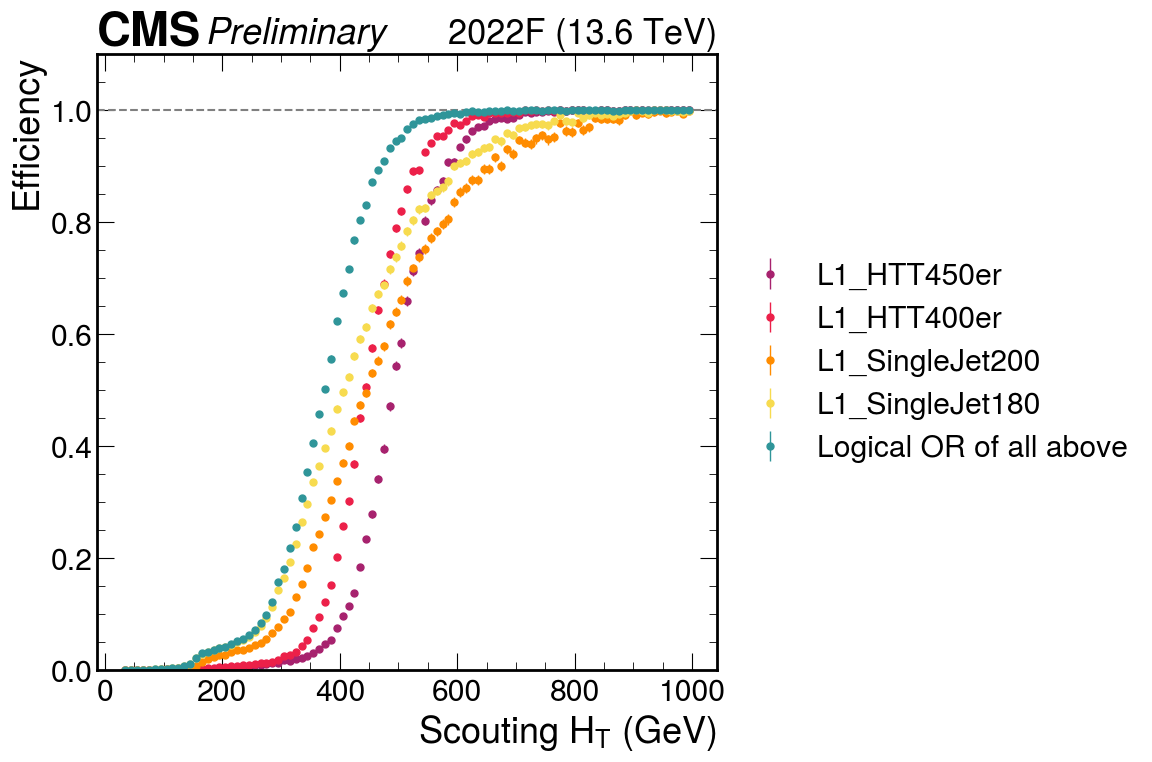

In [41]:
fig, ax = plt.subplots(figsize=(8,8))

# colours = {
#     'HTT450er' : "#E5FCC2",
#     'HTT400er' : "#9DE0AD",
#     'SingleJet200' : '#45ADA8',
#     'SingleJet180' : '#547980',
#     'any': "#594F4F",
# }

colours = {
    'HTT450er' : "#A7226e",
    'HTT400er' : "#EC2049",
    'SingleJet200' : '#FF8C00',
    'SingleJet180' : '#F7DB4F',
    'any': "#2F9599",
}

# colours = {
#     'HTT450er' : "#F8B195",
#     'HTT400er' : "#F67280",
#     'SingleJet200' : '#C06C84',
#     'SingleJet180' : '#6C5B7B',
#     'any': "#355C7D",
# }


for trigger in colours.keys():
    
    ptproj = (
        out["ak4"]
        .project("ht", "trigger")
    )
    denom = ptproj[:, hist.loc("none")]
    num = ptproj[:, hist.loc(trigger)]

    hist_data_before, hist_bins = denom.to_numpy()
    hist_data_after, hist_bins = num.to_numpy()

    from scipy.stats import beta

    def binom_int(num, den, confint=0.68):
        quant = (1 - confint)/ 2.
        low = beta.ppf(quant, num, den - num + 1)
        high = beta.ppf(1 - quant, num + 1, den - num)
        return (np.nan_to_num(low), np.where(np.isnan(high), 1, high))

    # calculating efficiency
    efficiency = hist_data_after/hist_data_before

    # getting error band
    band_low, band_high = binom_int(hist_data_after, hist_data_before)
    error_low = efficiency - band_low
    error_high = band_high - efficiency

    # removing large errors in empty bins
    error_low[error_low == 1] = 0
    error_high[error_high == 1] = 0

    # stacking errors
    error = np.concatenate((error_low.reshape(error_low.shape[0], 1), error_high.reshape(error_high.shape[0], 1)), axis=1)
   
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'elinewidth': 1,
        }
    
    ax.errorbar(
                    num.axes[0].centers,
                    efficiency,
                    yerr=error.T,
                    color=colours[trigger],
                    label="L1_" + trigger if trigger != "any" else "Logical OR of all above",
                    **data_err_opts,
                )

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"Scouting $H_T$ (GeV)")
ax.set_ylim(0, 1.1)
ax.axhline(y=1, linestyle="--", color="gray")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Efficiency")

In [3]:
out_o = util.load("outfiles/Run3Summer22EE/offline/trigger_Muon_Run2022F_ak4ht.coffea")[0]
out_s = util.load("outfiles/Run3Summer22EE/fulllumi/trigger_ScoutingPFMonitor_Run2022F_ak4ht.coffea")[0]

/tmp/ipykernel_30/1543147111.py:29: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before
/tmp/ipykernel_30/1543147111.py:29: RuntimeWarning: invalid value encountered in divide
  efficiency = hist_data_after/hist_data_before


(0.0, 2000.0)

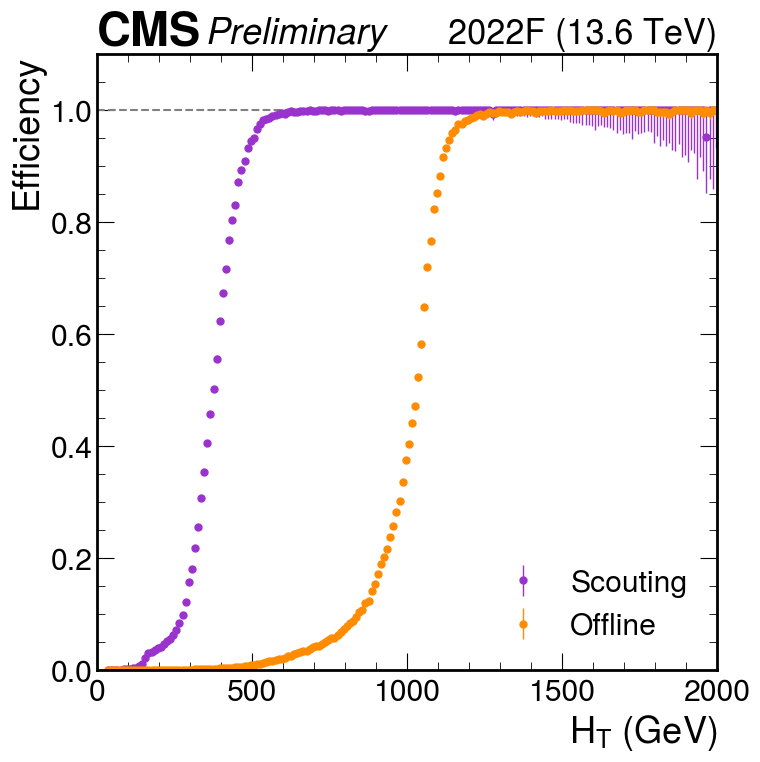

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

for rec in ["scouting", "offline"]:
    
    if rec == "scouting":
        out = out_s
    else:
        out = out_o
    
    ptproj = (
        out["ak4"]
        .project("ht", "trigger")
    )
    denom = ptproj[:, hist.loc("none")]
    num = ptproj[:, hist.loc("any")]

    hist_data_before, hist_bins = denom.to_numpy()
    hist_data_after, hist_bins = num.to_numpy()

    from scipy.stats import beta

    def binom_int(num, den, confint=0.68):
        quant = (1 - confint)/ 2.
        low = beta.ppf(quant, num, den - num + 1)
        high = beta.ppf(1 - quant, num + 1, den - num)
        return (np.nan_to_num(low), np.where(np.isnan(high), 1, high))

    # calculating efficiency
    efficiency = hist_data_after/hist_data_before

    # getting error band
    band_low, band_high = binom_int(hist_data_after, hist_data_before)
    error_low = efficiency - band_low
    error_high = band_high - efficiency

    # removing large errors in empty bins
    error_low[error_low == 1] = 0
    error_high[error_high == 1] = 0

    # stacking errors
    error = np.concatenate((error_low.reshape(error_low.shape[0], 1), error_high.reshape(error_high.shape[0], 1)), axis=1)

    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'elinewidth': 1,
        }
    
    ax.errorbar(
                num.axes[0].centers,
                efficiency,
                yerr=error.T,
                color="#9A32CD" if rec == "scouting" else "#FF8C00",
                label="Scouting" if rec == "scouting" else "Offline",
                **data_err_opts,
            )

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$H_T$ (GeV)")
ax.set_ylim(0, 1.1)
ax.axhline(y=1, linestyle="--", color="gray")
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='best')
ax.set_ylabel("Efficiency")
ax.set_xlim(0, 2000)